# Data Curation

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/cheminformatics-workflow/notebooks/4-Data_curation.ipynb)

Data curation in cheminformatics is standardizing and correcting chemical files to make them suitable for further use. This process is crucial in any cheminformatics task since failure to conduct an appropriate data curation will most certainly jeopardize the whole research at the early stage. Data curation can be divided into two major categories:
1.	**Structure data curation:** the goal is to modify the structure representation in the file so that it is correct from the chemistry point of view.
2.	**Property (activity) data curation:** the goal is to modify compound data in the file to be corrected and homogeneous. For instance, the same units and ID information.


- Functional group normalization, e.g., hypervalent nitro -> charge-separated form
- Remove redundant chirality specifications
- Neutralize molecules
- Remove salts/fragments
- Tautomer canonicalization

## Content

1. [Load Libraries](#1)
2. [Molecule Sanitization](#2)
    - 2.1 [Smiles Standarization](#3)
    - 2.2 [Fragment Parents](#4)
    - 2.3 [Neutralization](#5)
    - 2.4 [Normalization](#6)
    - 2.5 [Canonical Tautomer](#7)
    - 2.6 [Stereo Parents](#8)
    - 2.7 [Hydrogen Cleanup](#9)
    - 2.8 [Conformer Generation](#10)
3. [Function Definition](#11)
4. [Example with PubChem DataSet](#12)
    - 4.1 [Sanitization](#13)
        - 4.1.1 [Cleanup](#14)
        - 4.1.2 [Normalize](#15)
        - 4.1.3 [Fragment Parents](#16)
        - 4.1.4 [Neutralization](#17)
        - 4.1.5 [Canonical Tautomers](#18)
        - 4.1.6 [Stereo Parents](#19)
5. [Save DataSet](#20)

In [1]:
!pip install rdkit

In [2]:
!pip install mols2grid

## 1. Load Libraries<a name = 1></a>

In [3]:
import pandas as pd
import numpy as np

from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import Draw, Descriptors, PandasTools, AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
from rdkit.Chem.MolStandardize import rdMolStandardize

IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

import mols2grid

import rdkit
print(rdkit.__version__)

2023.09.1


## 2. Molecules Sanitization<a name = 2></a>

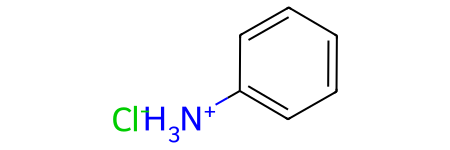

In [4]:
mol1_smiles = 'c1ccccc1[NH3+].[Cl-]'
anhiline_chloride = Chem.MolFromSmiles(mol1_smiles)
anhiline_chloride

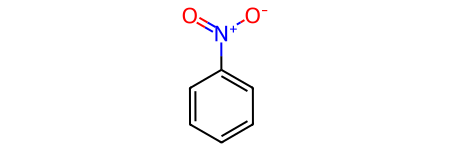

In [5]:
mol2_smiles = 'c1ccccc1[N+](=O)[O-]'
nitrobenzene = Chem.MolFromSmiles(mol2_smiles)
nitrobenzene

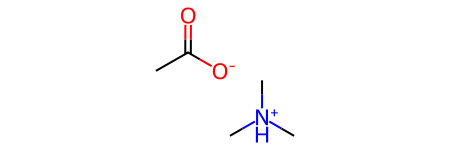

In [6]:
mol3_smiles = 'C[NH+](C)C.CC(=O)[O-]'
trimethyl_acetate = Chem.MolFromSmiles(mol3_smiles)
trimethyl_acetate

In [7]:
#Make a DataFrame
chemlist = [anhiline_chloride, nitrobenzene, trimethyl_acetate]
chemlist

In [8]:
chemlist_df = pd.DataFrame(chemlist, index=['anhiline_chloride', 'nitrobenzene', 'trimethyl_acetate'], columns=['Molecule'])
chemlist_df

Molecule
anhiline_chloride  <rdkit.Chem.rdchem.Mol object at 0x7e4897e93d10>
nitrobenzene       <rdkit.Chem.rdchem.Mol object at 0x7e4897dccba0>
trimethyl_acetate  <rdkit.Chem.rdchem.Mol object at 0x7e4897dccdd0>

### 2.1 Smiles Standarization<a name = 3></a>

In [9]:
similes_collections = [mol1_smiles, mol2_smiles, mol3_smiles]
smiles_std = [rdMolStandardize.StandardizeSmiles(smiles) for smiles in similes_collections]

[10:02:59] Initializing MetalDisconnector
[10:02:59] Running MetalDisconnector
[10:02:59] Initializing Normalizer
[10:02:59] Running Normalizer
[10:02:59] Initializing MetalDisconnector
[10:02:59] Running MetalDisconnector
[10:02:59] Initializing Normalizer
[10:02:59] Running Normalizer
[10:02:59] Initializing MetalDisconnector
[10:02:59] Running MetalDisconnector
[10:02:59] Initializing Normalizer
[10:02:59] Running Normalizer


In [10]:
smiles_std

['[Cl-].[NH3+]c1ccccc1', 'O=[N+]([O-])c1ccccc1', 'CC(=O)[O-].C[NH+](C)C']

In [11]:
similes_collections

['c1ccccc1[NH3+].[Cl-]', 'c1ccccc1[N+](=O)[O-]', 'C[NH+](C)C.CC(=O)[O-]']

The standarization changes the order of the anion and cation

In [12]:
smiles_std[0]

'[Cl-].[NH3+]c1ccccc1'

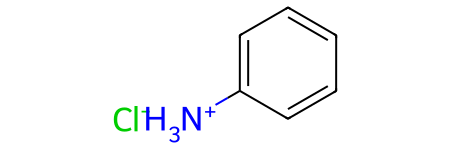

In [13]:
Chem.MolFromSmiles(smiles_std[0])

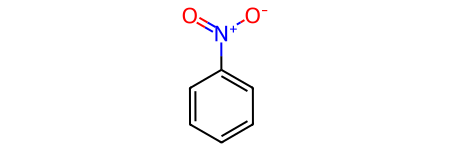

In [14]:
chemlist_df['Molecule'][1]

### 2.2 Fragment Parent<a name = 4></a>

In [15]:
#split slat/mixture
fragment_parents = [rdMolStandardize.FragmentParent(mol) for mol in chemlist_df['Molecule']]

[10:02:59] Initializing MetalDisconnector
[10:02:59] Running MetalDisconnector
[10:02:59] Initializing Normalizer
[10:02:59] Running Normalizer
[10:02:59] Running LargestFragmentChooser
[10:02:59] Fragment: [NH3+]c1ccccc1
[10:02:59] New largest fragment: [NH3+]c1ccccc1 (15)
[10:02:59] Fragment: [Cl-]
[10:02:59] Initializing MetalDisconnector
[10:02:59] Running MetalDisconnector
[10:02:59] Initializing Normalizer
[10:02:59] Running Normalizer
[10:02:59] Running LargestFragmentChooser
[10:02:59] Fragment: O=[N+]([O-])c1ccccc1
[10:02:59] New largest fragment: O=[N+]([O-])c1ccccc1 (14)
[10:02:59] Initializing MetalDisconnector
[10:02:59] Running MetalDisconnector
[10:02:59] Initializing Normalizer
[10:02:59] Running Normalizer
[10:02:59] Running LargestFragmentChooser
[10:02:59] Fragment: C[NH+](C)C
[10:02:59] New largest fragment: C[NH+](C)C (14)
[10:02:59] Fragment: CC(=O)[O-]


In [16]:
fragment_parents

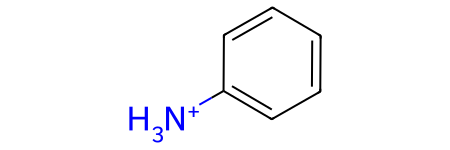

In [17]:
fragment_parents[0]

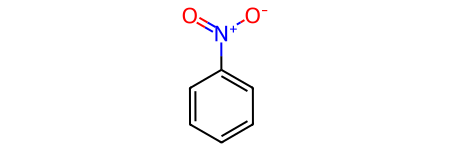

In [18]:
fragment_parents[1]

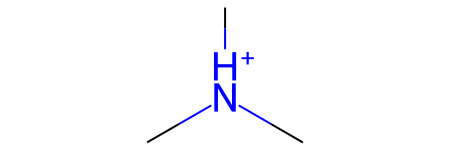

In [19]:
fragment_parents[2]

RDKit only kept the cation and not the anion!

### 2.3 Neutralization<a name = 5></a>

In [20]:
## Neutralization

uncharger = rdMolStandardize.Uncharger()
uncharge = [uncharger.uncharge(mol) for mol in chemlist_df['Molecule']]

[10:02:59] Running Uncharger
[10:02:59] Removed negative charge.
[10:02:59] Removed positive charge.
[10:02:59] Running Uncharger
[10:02:59] Running Uncharger
[10:02:59] Removed negative charge.


In [21]:
uncharge

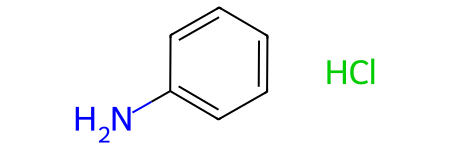

In [22]:
uncharge[0]

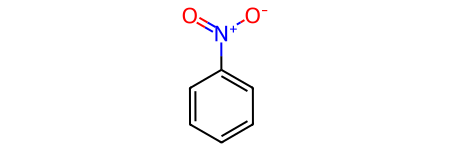

In [23]:
uncharge[1]

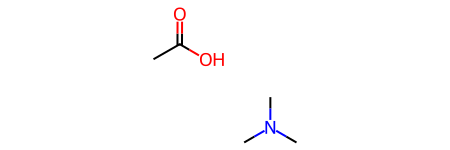

In [24]:
uncharge[2]

### 2.4 Normalization<a name = 6></a>

In [25]:
## Normalization
normalization = [rdMolStandardize.Normalize(mol) for mol in chemlist_df['Molecule']]

[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer


In [26]:
normalization

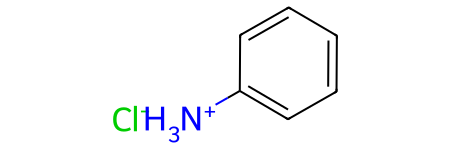

In [27]:
normalization[0]

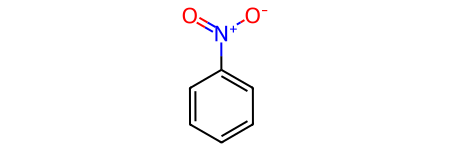

In [28]:
normalization[1]

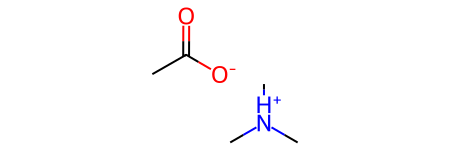

In [29]:
normalization[2]

### 2.5 Canonical Tautomer<a name = 7></a>

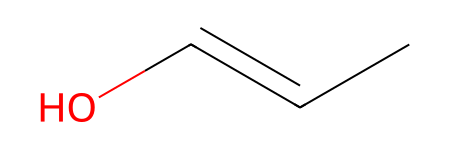

In [30]:
#Let's creat propanal
pronanal_smiles = 'CC=CO'
propanal = Chem.MolFromSmiles(pronanal_smiles)
propanal

[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer


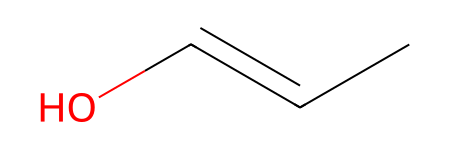

In [31]:
rdMolStandardize.Normalize(propanal)

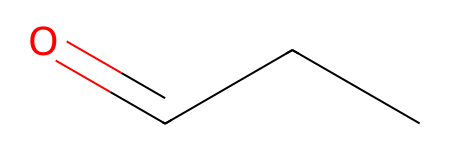

In [32]:
rdMolStandardize.CanonicalTautomer(propanal)

In [33]:
canonical_tautomer = [rdMolStandardize.CanonicalTautomer(mol) for mol in chemlist_df['Molecule']]

### 2.6 Stereo Parents<a name = 8></a>

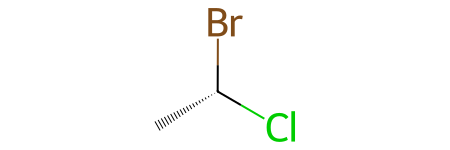

In [34]:
## Stereo compounds
smiles_stereo = 'C[C@@H](Cl)(Br)'
mol_stereo = Chem.MolFromSmiles(smiles_stereo)
mol_stereo

[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer


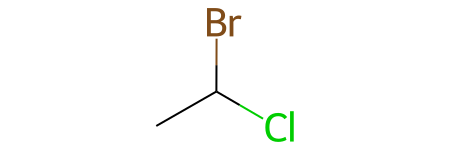

In [35]:
# Stereo cleaning
rdMolStandardize.StereoParent(mol_stereo)

In [36]:
stereo_parent = [rdMolStandardize.StereoParent(mol) for mol in chemlist_df['Molecule']]

[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer


### 2.7 Hydrogen cleanup<a name = 9></a>

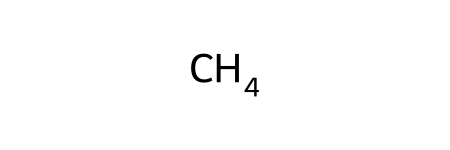

In [37]:
# hydrogen cleanup
smiles_methane = 'C'
mol_methane = Chem.MolFromSmiles(smiles_methane)
mol_methane

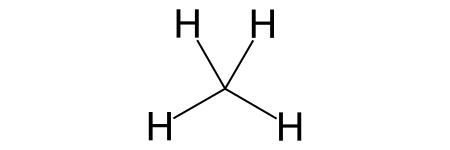

In [38]:
mol_methane_explicitH = Chem.AddHs(mol_methane)
mol_methane_explicitH

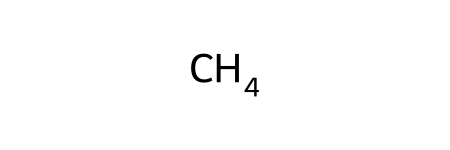

In [39]:
Chem.RemoveHs(mol_methane_explicitH)

### 2.8 Conformer Generation<a name = 10></a>

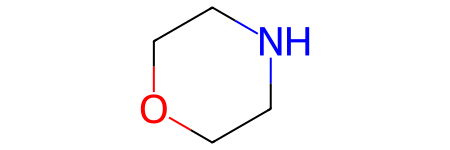

In [40]:
# 3D examples - morpholine
smiles_morpholine = 'N1CCOCC1'
mol_morpholine = Chem.MolFromSmiles(smiles_morpholine)
mol_morpholine

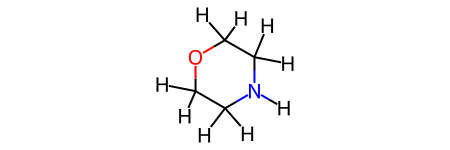

In [41]:
## Conformer generation
mol_morpholine = Chem.AddHs(mol_morpholine) # We first need to add the Hydrogens
mol_morpholine

In [42]:
AllChem.Compute2DCoords(mol_morpholine)
AllChem.EmbedMolecule(mol_morpholine) # Generates 3D coordinates
print(Chem.MolToMolBlock(mol_morpholine))


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
    0.0832    1.2613    0.2178 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2390    0.4665    0.0322 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0376   -0.9641   -0.2264 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2379   -1.4074   -0.3708 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2008   -0.7677    0.3427 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1668    0.7017    0.0088 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1818    2.0945    0.7936 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8432    0.9474   -0.7939 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8931    0.6076    0.9441 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.6023   -1.2639   -1.1604 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5246   -1.5865    0.5799 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1947   -0.9639    1.4307 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1981   -1.1423   -0.0188 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9362    1.2209    0

In [43]:
#Experimental Torsion-angle preference with Knowledge-based and Distance Geometry
#It gives more accuracy to the 3D structure
AllChem.EmbedMolecule(mol_morpholine, AllChem.ETKDG())
print(Chem.MolToMolBlock(mol_morpholine))


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
    0.5089   -1.1855    0.3207 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8653   -0.9071    0.0264 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2668    0.4409    0.6036 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3030    1.4032    0.3884 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.6009    1.0465   -0.6244 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3882   -0.1972   -0.2339 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7026   -1.4299    1.3035 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5212   -1.6900    0.4096 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9572   -0.8346   -1.0848 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2597    0.7486    0.2064 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4124    0.3173    1.7022 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0733    0.8745   -1.5699 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.2869    1.9278   -0.7306 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8232   -0.6313   -1

In [44]:
#We can also do an energy minimization
AllChem.UFFOptimizeMolecule(mol_morpholine)
print(Chem.MolToMolBlock(mol_morpholine))


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
    0.6195   -1.1856    0.3733 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8260   -1.0704    0.1498 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3293    0.3558    0.4717 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2705    1.2788    0.6576 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.6387    1.1852   -0.4190 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3521   -0.1822   -0.4147 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8103   -1.0179    1.3899 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3578   -1.8130    0.7836 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0538   -1.3183   -0.9105 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0130    0.7143   -0.3300 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9217    0.3228    1.4106 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1176    1.3499   -1.3907 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.3937    1.9935   -0.3191 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4649   -0.5462   -1

## 3. Function Definition<a name = 11></a>

Now, let's put everything together

In [45]:
def standarization_fx(chemdata):
    """
    Standardize a list of RDKit molecule objects by removing salts and fragments,
    uncharging the molecules, finding the canonical tautomer,
    normalizing the molecules, and returning the stereochemistry parent.

    Parameters:
    - chemdata (list of rdkit.Chem.Mol objects): The list of molecule objects to be standardized.

    Returns:
    - list of rdkit.Chem.Mol objects: The list of standardized molecule objects.
    """

    # Create an uncharger object which will be used to uncharge molecules
    uncharger = rdMolStandardize.Uncharger()

    # Initialize a list to hold standardized molecule objects
    standardized = []

    for mol in chemdata:
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        new_mol = rdMolStandardize.Cleanup(mol)
        # Remove salts and fragments, keeping the largest organic component
        newmol = rdMolStandardize.FragmentParent(mol)
        # Uncharge the molecule
        newmol = uncharger.uncharge(newmol)
        # Find the canonical (most stable) tautomer
        newmol = rdMolStandardize.CanonicalTautomer(newmol)
        # Apply normalization (standardize functional groups and reagents)
        newmol = rdMolStandardize.Normalize(newmol)
        # Get the parent stereochemistry of the molecule
        newmol = rdMolStandardize.StereoParent(newmol)

        standardized.append(newmol)

    # Return the list of standardized molecules
    return standardized

In [46]:
chemlist_df_std = standarization_fx(chemlist_df['Molecule'])
chemlist_df['Standarized'] = chemlist_df_std

[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Running LargestFragmentChooser
[10:03:00] Fragment: [NH3+]c1ccccc1
[10:03:00] New largest fragment: [NH3+]c1ccccc1 (15)
[10:03:00] Fragment: [Cl-]
[10:03:00] Running Uncharger
[10:03:00] Removed positive charge.
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Normalizer
[10:03:00] Initializing MetalDisconnector
[10:03:00] Running MetalDisconnector
[10:03:00] Initializing Normalizer
[10:03:00] Running Nor

In [47]:
chemlist_df

Molecule  \
anhiline_chloride  <rdkit.Chem.rdchem.Mol object at 0x7e4897e93d10>   
nitrobenzene       <rdkit.Chem.rdchem.Mol object at 0x7e4897dccba0>   
trimethyl_acetate  <rdkit.Chem.rdchem.Mol object at 0x7e4897dccdd0>   

                                                        Standarized  
anhiline_chloride  <rdkit.Chem.rdchem.Mol object at 0x7e4897e70ba0>  
nitrobenzene       <rdkit.Chem.rdchem.Mol object at 0x7e4897e70c80>  
trimethyl_acetate  <rdkit.Chem.rdchem.Mol object at 0x7e4897e70d60>

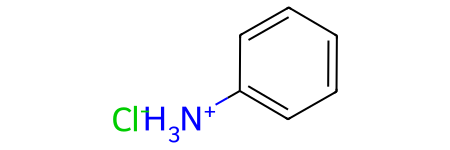

In [48]:
chemlist_df['Molecule'][0]

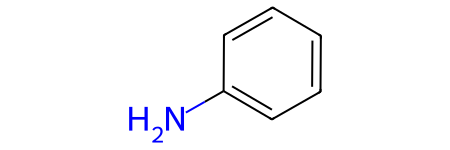

In [49]:
chemlist_df['Standarized'][0]

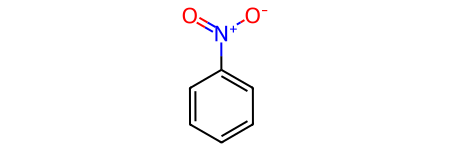

In [50]:
chemlist_df['Molecule'][1]

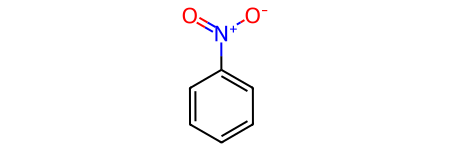

In [51]:
chemlist_df['Standarized'][1]

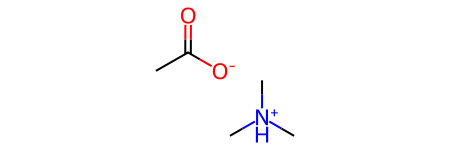

In [52]:
chemlist_df['Molecule'][2]

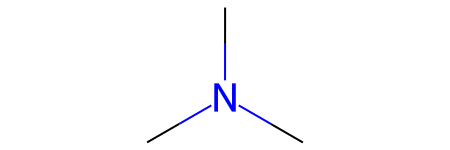

In [53]:
chemlist_df['Standarized'][2]

## 4. Example with PubChem DataSet<a name = 12></a>

In [54]:
data = PandasTools.LoadSDF('AID_1259247_final.sdf', molColName='Molecule')
data['Antagonist Efficacy (%)'] = data['Antagonist Efficacy (%)'].astype('float64')

[10:03:01] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 20 ignored
[10:03:01] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 14 ignored
[10:03:01] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 14 ignored
[10:03:01] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[10:03:01] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 8 ignored
[10:03:01] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 4 ignored
[10:03:01] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 3 ignored
[10:03:01] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 6 ignored
[10:03:01] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 4 ignored
[10:03:01] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 3 ignored
[10:03:02] WARNING: not removing hydrogen atom without neighbors
[10:03:02] Wa

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

      Antagonist Efficacy (%) ID  \
0                    -37.5702      
1                    -37.9252      
2                    -35.8470      
3                    -35.5194      
4                    -39.4007      
...                       ... ..   
5129                   0.0000      
5130                   0.0000      
5131                   0.0000      
5132                   0.0000      
5133                   0.0000      

                                              Molecule  
0     <rdkit.Chem.rdchem.Mol object at 0x7e4897e71540>  
1     <rdkit.Chem.rdchem.Mol object at 0x7e4897e715b0>  
2     <rdkit.Chem.rdchem.Mol object at 0x7e4897e71620>  
3     <rdkit.Chem.rdchem.Mol object at 0x7e4897e71700>  
4     <rdkit.Chem.rdchem.Mol object at 0x7e4897e717e0>  
...                                                ...  
5129  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae030>  
5130  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae0a0>  
5131  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae110>  
5132  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae180>  
5133  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae1f0>  

[5134 rows x 7 columns]
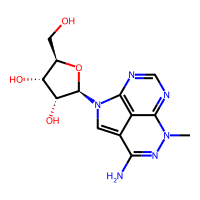
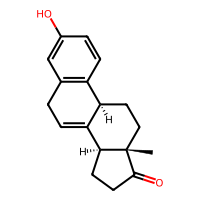
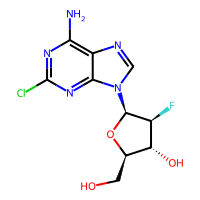
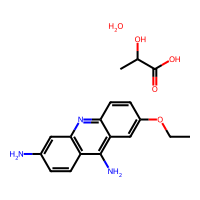
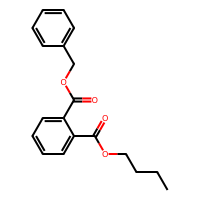
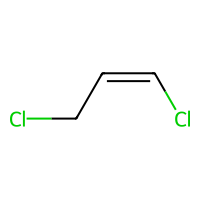
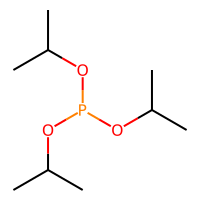
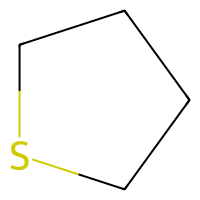
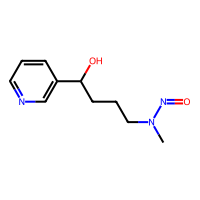
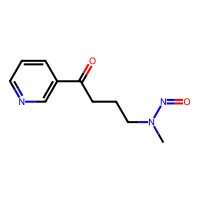

In [55]:
data

In [56]:
mols2grid.display(data, smiles_col = "PUBCHEM_SMILES", mol_col = 'Molecule')

Output hidden; open in https://colab.research.google.com to view.

### 4.1 Sanitization<a name = 13></a>

#### 4.1.1 Cleanup<a name = 14></a>


In [57]:
cleanup = []
cleanup_legends = []

for smiles in data['PUBCHEM_SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    mol_norm = rdMolStandardize.Cleanup(mol)
    cleanup.extend([mol, mol_norm])
    cleanup_legends.extend(['before normalize', 'after normalize'])

Streaming output truncated to the last 5000 lines.
[10:03:18] Initializing MetalDisconnector
[10:03:18] Running MetalDisconnector
[10:03:18] Initializing Normalizer
[10:03:18] Running Normalizer
[10:03:18] Initializing MetalDisconnector
[10:03:18] Running MetalDisconnector
[10:03:18] Initializing Normalizer
[10:03:18] Running Normalizer
[10:03:18] Initializing MetalDisconnector
[10:03:18] Running MetalDisconnector
[10:03:18] Initializing Normalizer
[10:03:18] Running Normalizer
[10:03:18] Initializing MetalDisconnector
[10:03:18] Running MetalDisconnector
[10:03:18] Initializing Normalizer
[10:03:18] Running Normalizer
[10:03:18] Initializing MetalDisconnector
[10:03:18] Running MetalDisconnector
[10:03:18] Initializing Normalizer
[10:03:18] Running Normalizer
[10:03:18] Initializing MetalDisconnector
[10:03:18] Running MetalDisconnector
[10:03:18] Initializing Normalizer
[10:03:18] Running Normalizer
[10:03:18] Initializing MetalDisconnector
[10:03:18] Running MetalDisconnector
[10:03

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


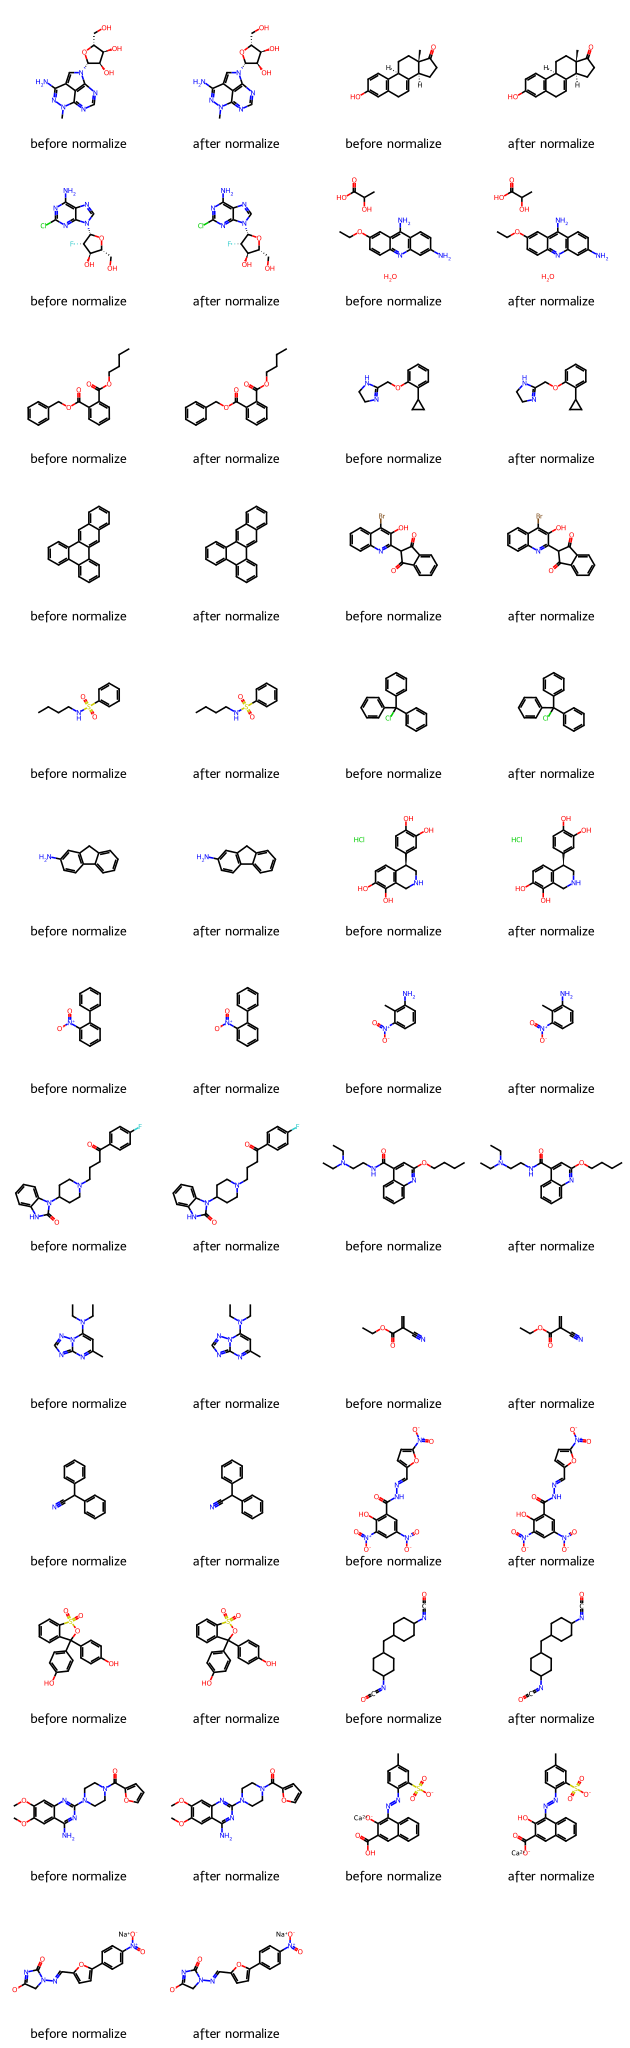

In [58]:
Draw.MolsToGridImage(cleanup, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=cleanup_legends)

#### 4.1.2 Normalize<a name = 15></a>

In [59]:
normalize = []
norm_legends = []

# Only neutralize the 'after normalize' molecules
for i in range(1, len(cleanup), 2): # Start at index 1 and skip every other molecule
    mol_cleanup = cleanup[i] # This is the 'after normalize' molecule
    mol_norm = rdMolStandardize.Normalize(mol_cleanup)
    normalize.extend([mol_cleanup, mol_norm])
    norm_legends.extend(['before normalize', 'after normalize'])

Streaming output truncated to the last 5000 lines.
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:03:24] Running Normalizer
[10:03:24] Initializing Normalizer
[10:

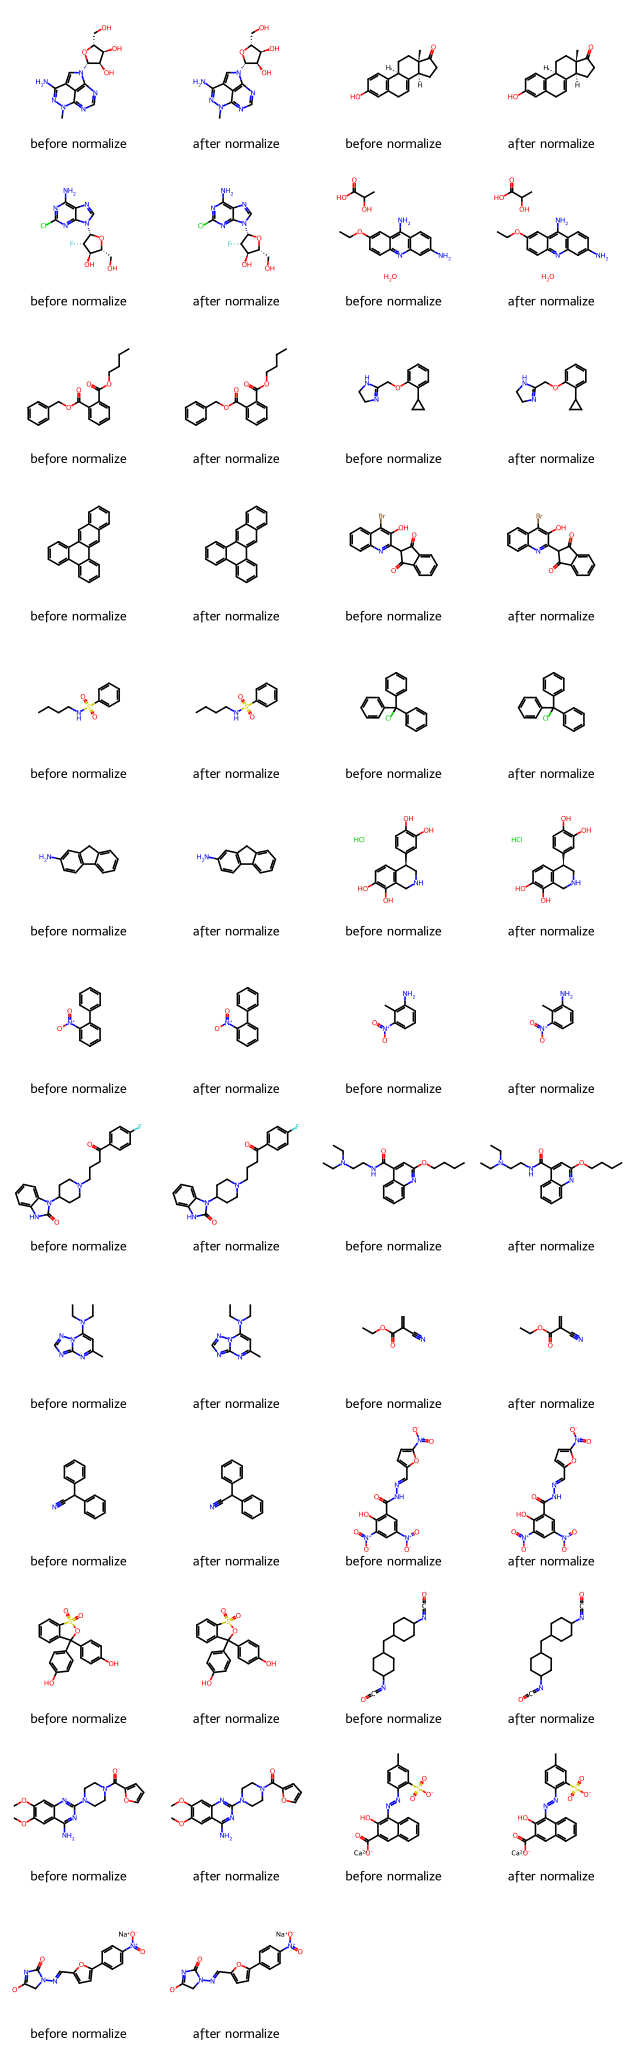

In [60]:
Draw.MolsToGridImage(normalize, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=norm_legends)

#### 4.1.3 Fragment Parents<a name = 16></a>

In [61]:
fragment_parents = []
fragm_legends = []

for i in range(1, len(normalize), 2):
    mol_norm = normalize[i]
    mol_frag = rdMolStandardize.FragmentParent(mol_norm)
    fragment_parents.extend([mol_norm, mol_frag])
    fragm_legends.extend(['before fragment parents', 'after fragment parents'])

Streaming output truncated to the last 5000 lines.
[10:03:41] Running MetalDisconnector
[10:03:41] Initializing Normalizer
[10:03:41] Running Normalizer
[10:03:41] Running LargestFragmentChooser
[10:03:41] Fragment: [Fe+2]
[10:03:41] New largest fragment: [Fe+2] (1)
[10:03:41] Fragment: O=S(=O)([O-])[O-]
[10:03:41] New largest fragment: O=S(=O)([O-])[O-] (5)
[10:03:41] WARNING: not removing hydrogen atom without neighbors
[10:03:41] Initializing MetalDisconnector
[10:03:41] Running MetalDisconnector
[10:03:41] Initializing Normalizer
[10:03:41] Running Normalizer
[10:03:41] Running LargestFragmentChooser
[10:03:41] Fragment: F[B-](F)(F)F
[10:03:41] New largest fragment: F[B-](F)(F)F (5)
[10:03:41] Fragment: [H+]
[10:03:41] Initializing MetalDisconnector
[10:03:41] Running MetalDisconnector
[10:03:41] Initializing Normalizer
[10:03:41] Running Normalizer
[10:03:41] Running LargestFragmentChooser
[10:03:41] Fragment: Nc1c(Br)cc(Br)c2c1C(=O)c1ccccc1C2=O
[10:03:41] New largest fragment: Nc

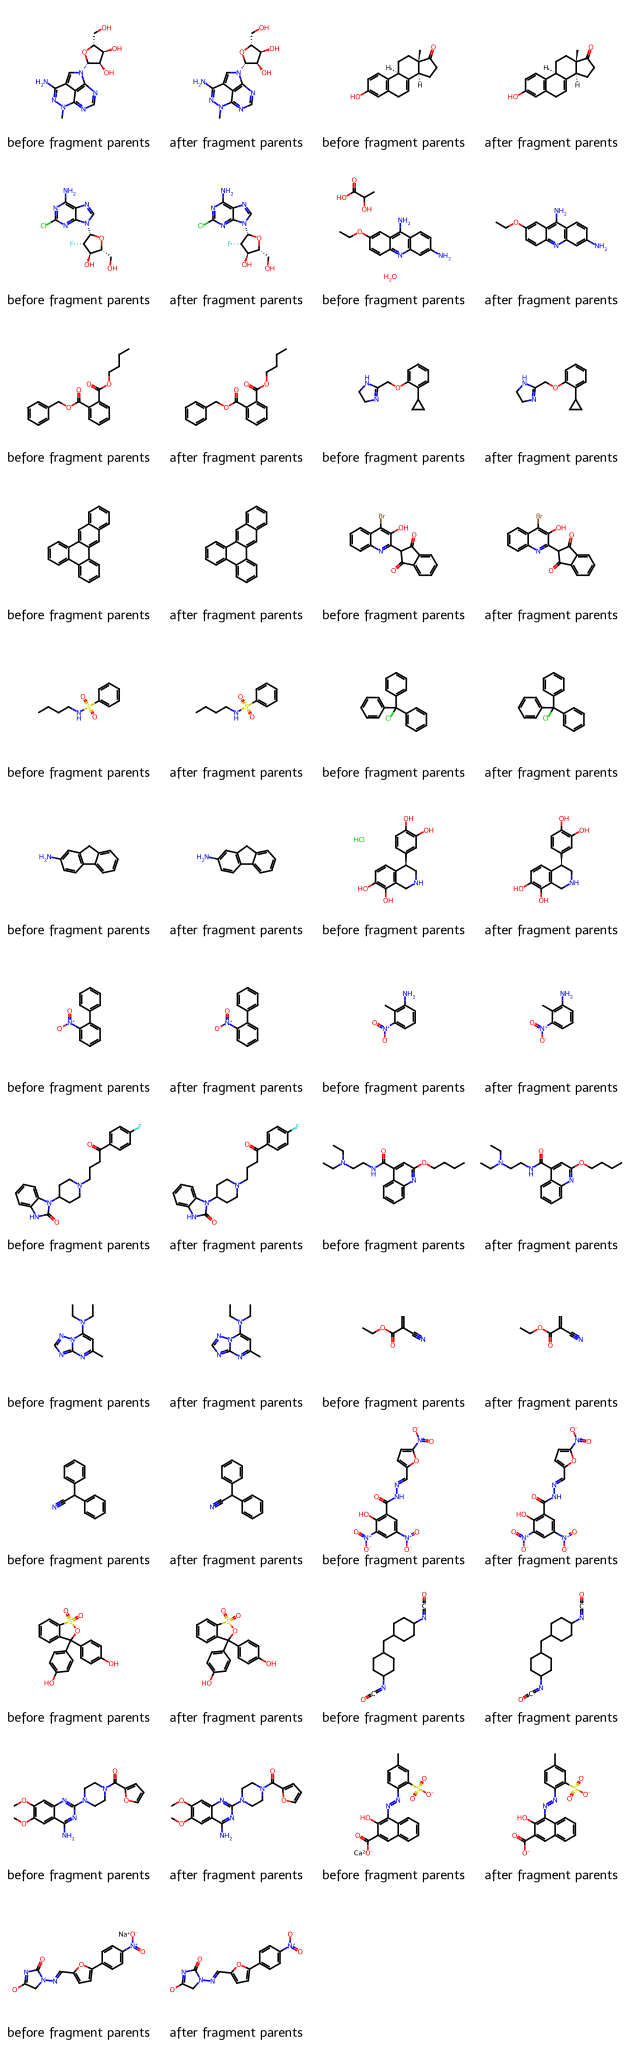

In [62]:
Draw.MolsToGridImage(fragment_parents, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=fragm_legends)

#### 4.1.4 Neutralization<a name = 17></a>

In [63]:
neutralized = []
neut_legends = []

uncharger = rdMolStandardize.Uncharger()

for i in range(1, len(fragment_parents), 2):
    mol_frag = fragment_parents[i]
    mol_neut = uncharger.uncharge(mol_frag)
    neutralized.extend([mol_frag, mol_neut])
    neut_legends.extend(['before neutralize', 'after neutralize'])

Streaming output truncated to the last 5000 lines.
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Removed negative charge.
[10:03:43] Removed negative charge.
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:43] Running Uncharger
[10:03:

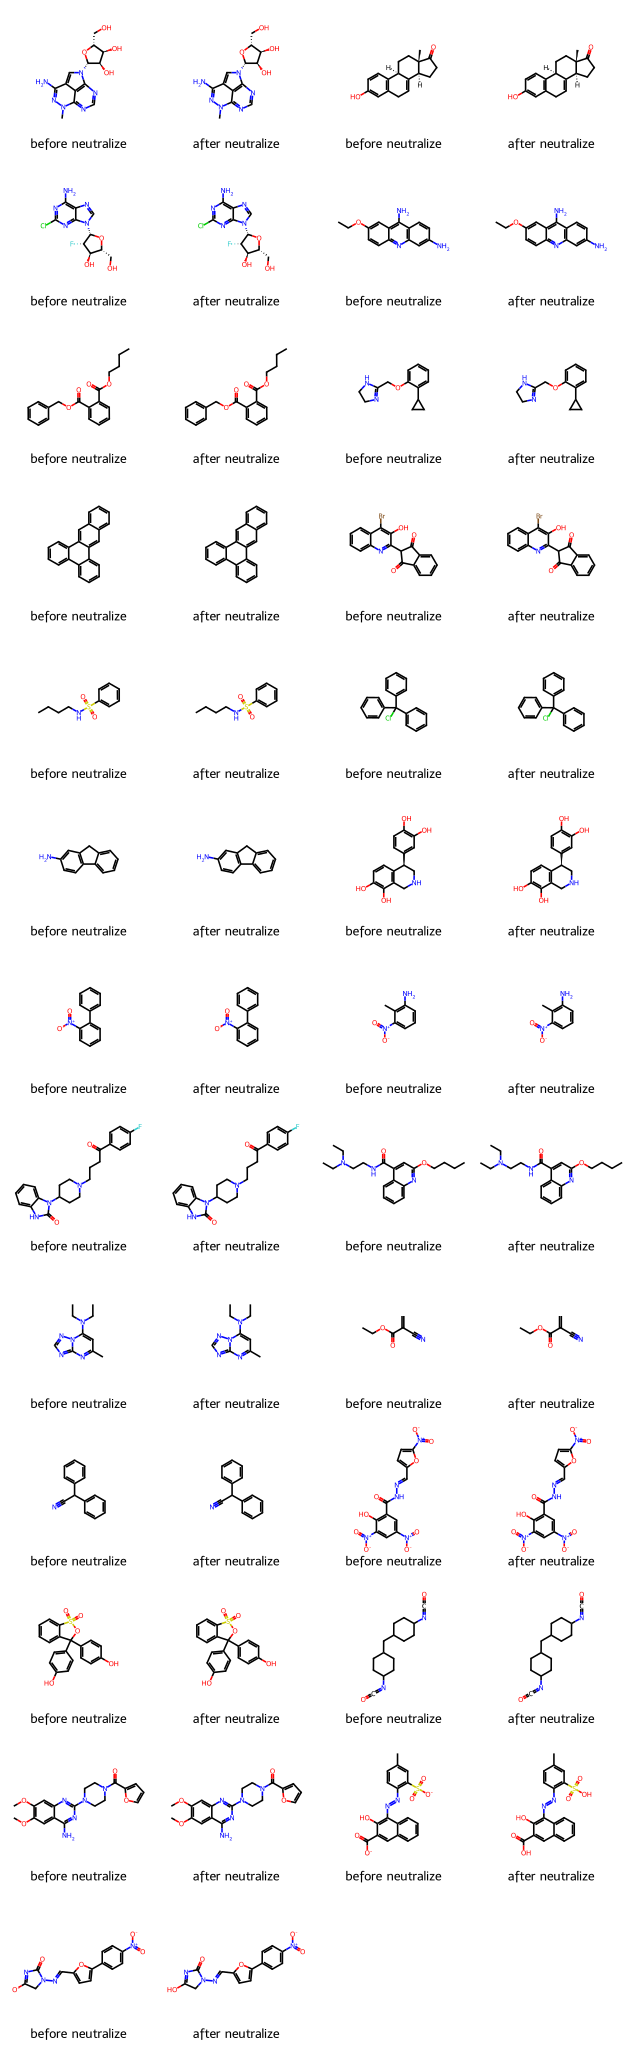

In [64]:
Draw.MolsToGridImage(neutralized, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=neut_legends)

#### 4.1.5 Canonical Tautomers<a name = 18></a>

In [65]:
canonical_tautomers = []
canon_legend = []

for i in range(1, len(neutralized), 2):
    mol_neut = neutralized[i]
    mol_canon_taut = rdMolStandardize.CanonicalTautomer(mol_neut)
    canonical_tautomers.extend([mol_neut, mol_canon_taut])
    canon_legend.extend(['before canonical tautomer', 'after canonical tautomer'])

[10:03:46] Tautomer enumeration stopped at 357 tautomers: max transforms reached
[10:03:47] Tautomer enumeration stopped at 375 tautomers: max transforms reached
[10:03:48] Tautomer enumeration stopped at 626 tautomers: max transforms reached
[10:03:49] Tautomer enumeration stopped at 458 tautomers: max transforms reached
[10:03:51] Can't kekulize mol.  Unkekulized atoms: 2 6 7 8 9 10
[10:03:51] Can't kekulize mol.  Unkekulized atoms: 2 6 7 8 9 10
[10:03:52] Tautomer enumeration stopped at 164 tautomers: max transforms reached
[10:03:56] Can't kekulize mol.  Unkekulized atoms: 2 6
[10:03:58] Tautomer enumeration stopped at 358 tautomers: max transforms reached
[10:04:00] Tautomer enumeration stopped at 486 tautomers: max transforms reached
[10:04:02] Can't kekulize mol.  Unkekulized atoms: 2 5
[10:04:03] Tautomer enumeration stopped at 169 tautomers: max transforms reached
[10:04:04] Tautomer enumeration stopped at 942 tautomers: max transforms reached
[10:04:06] Tautomer enumeration s

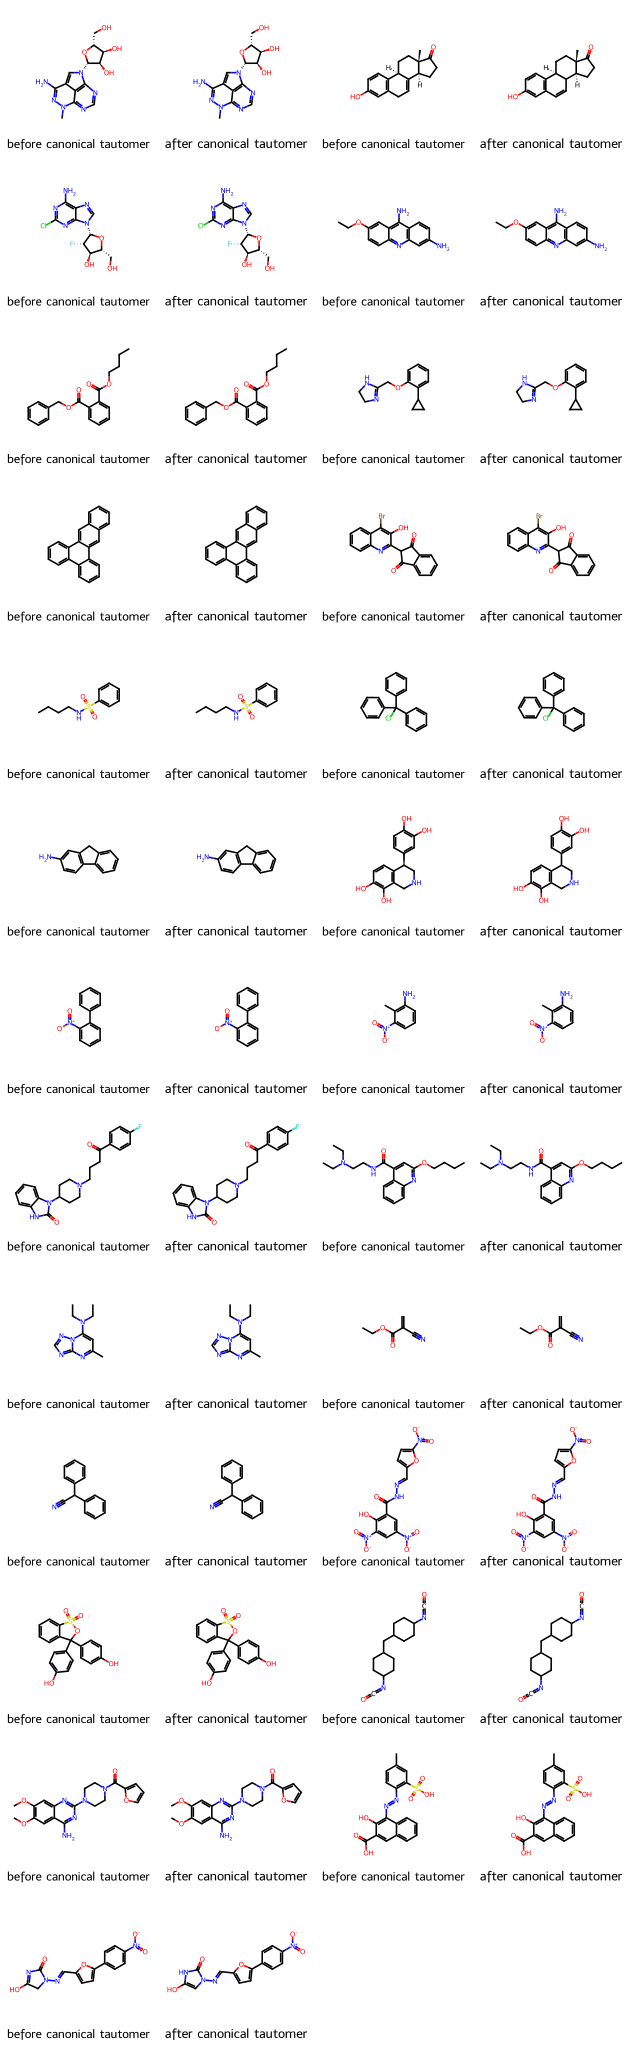

In [66]:
Draw.MolsToGridImage(canonical_tautomers, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=canon_legend)

#### 4.1.6 Stereo Parents<a name = 19></a>

In [67]:
stereo = []
stereo_legends = []

for i in range(1, len(canonical_tautomers), 2):
    canon_mol = canonical_tautomers[i]
    stereo_mol = rdMolStandardize.StereoParent(canon_mol)
    stereo.extend([canon_mol, stereo_mol])
    stereo_legends.extend(['before canonical stereo', 'after canonical stereo'])

Streaming output truncated to the last 5000 lines.
[10:04:58] Initializing MetalDisconnector
[10:04:58] Running MetalDisconnector
[10:04:58] Initializing Normalizer
[10:04:58] Running Normalizer
[10:04:58] Initializing MetalDisconnector
[10:04:58] Running MetalDisconnector
[10:04:58] Initializing Normalizer
[10:04:58] Running Normalizer
[10:04:58] Initializing MetalDisconnector
[10:04:58] Running MetalDisconnector
[10:04:58] Initializing Normalizer
[10:04:58] Running Normalizer
[10:04:58] Initializing MetalDisconnector
[10:04:58] Running MetalDisconnector
[10:04:58] Initializing Normalizer
[10:04:58] Running Normalizer
[10:04:58] Initializing MetalDisconnector
[10:04:58] Running MetalDisconnector
[10:04:58] Initializing Normalizer
[10:04:58] Running Normalizer
[10:04:58] Initializing MetalDisconnector
[10:04:58] Running MetalDisconnector
[10:04:58] Initializing Normalizer
[10:04:58] Running Normalizer
[10:04:58] Initializing MetalDisconnector
[10:04:58] Running MetalDisconnector
[10:04

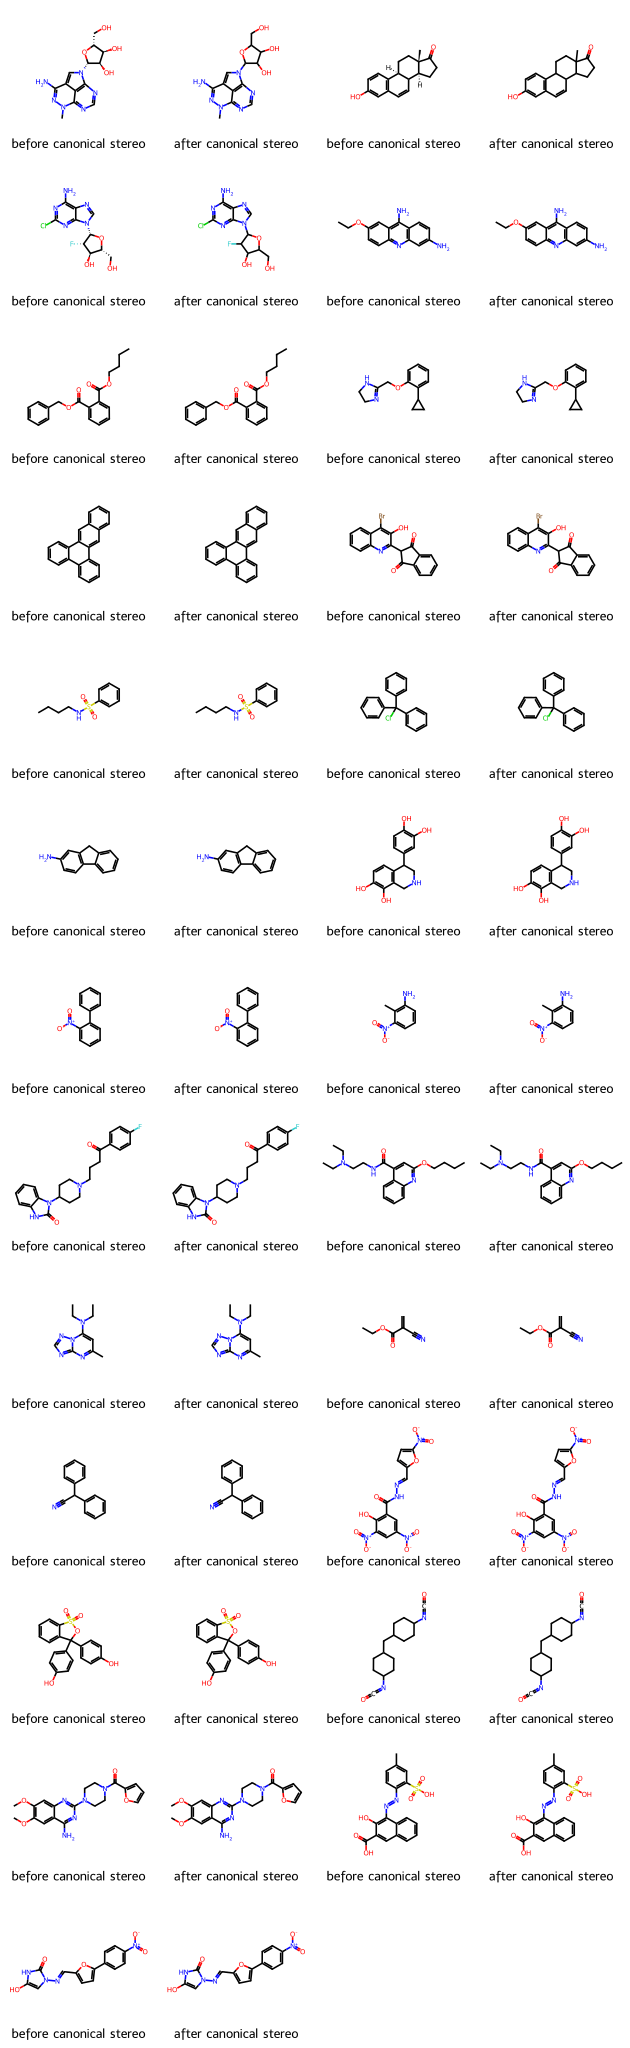

In [68]:
Draw.MolsToGridImage(stereo, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=stereo_legends)

In [69]:
sanitized_mol = []

for i in range(1, len(stereo), 2):
    mol = stereo[i]
    sanitized_mol.append(mol)

In [70]:
len(sanitized_mol)

5134

In [71]:
len(data)

5134

In [72]:
data['Sanitized Molecules'] = sanitized_mol

PUBCHEM_SMILES  \
0     CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...   
1     C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O   
2     C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...   
3     CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...   
4               CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2   
...                                                 ...   
5129                                       C(/C=C\Cl)Cl   
5130                              CC(C)OP(OC(C)C)OC(C)C   
5131                                            C1CCSC1   
5132                          CN(CCCC(C1=CN=CC=C1)O)N=O   
5133                         CN(CCCC(=O)C1=CN=CC=C1)N=O   

     PUBCHEM_ACTIVITY_OUTCOME Antagonist Activity Viability Activity  \
0                      Active   active antagonist           inactive   
1                      Active   active antagonist           inactive   
2                      Active   active antagonist           inactive   
3                      Active   active antagonist           inactive   
4                      Active   active antagonist           inactive   
...                       ...                 ...                ...   
5129                 Inactive            inactive           inactive   
5130                 Inactive            inactive           inactive   
5131                 Inactive            inactive           inactive   
5132                 Inactive            inactive           inactive   
5133                 Inactive            inactive           inactive   

      Antagonist Efficacy (%) ID  \
0                    -37.5702      
1                    -37.9252      
2                    -35.8470      
3                    -35.5194      
4                    -39.4007      
...                       ... ..   
5129                   0.0000      
5130                   0.0000      
5131                   0.0000      
5132                   0.0000      
5133                   0.0000      

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7e4897e71540>   
1     <rdkit.Chem.rdchem.Mol object at 0x7e4897e715b0>   
2     <rdkit.Chem.rdchem.Mol object at 0x7e4897e71620>   
3     <rdkit.Chem.rdchem.Mol object at 0x7e4897e71700>   
4     <rdkit.Chem.rdchem.Mol object at 0x7e4897e717e0>   
...                                                ...   
5129  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae030>   
5130  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae0a0>   
5131  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae110>   
5132  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae180>   
5133  <rdkit.Chem.rdchem.Mol object at 0x7e48976ae1f0>   

                                   Sanitized Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x7e4895791cb0>  
1     <rdkit.Chem.rdchem.Mol object at 0x7e4895791bd0>  
2     <rdkit.Chem.rdchem.Mol object at 0x7e4895791b60>  
3     <rdkit.Chem.rdchem.Mol object at 0x7e4895791af0>  
4     <rdkit.Chem.rdchem.Mol object at 0x7e4895791a80>  
...                                                ...  
5129  <rdkit.Chem.rdchem.Mol object at 0x7e4895853a70>  
5130  <rdkit.Chem.rdchem.Mol object at 0x7e4895853ae0>  
5131  <rdkit.Chem.rdchem.Mol object at 0x7e4895853b50>  
5132  <rdkit.Chem.rdchem.Mol object at 0x7e4895853bc0>  
5133  <rdkit.Chem.rdchem.Mol object at 0x7e4895853c30>  

[5134 rows x 8 columns]
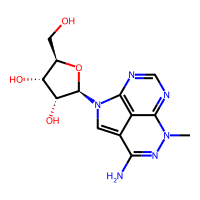
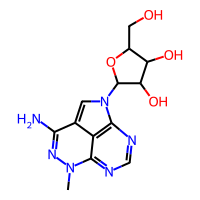
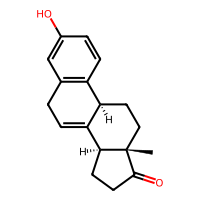
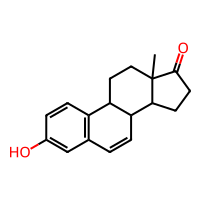
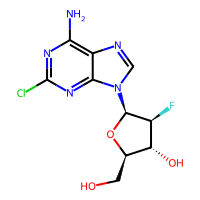
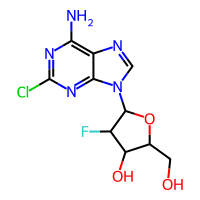
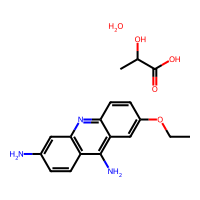
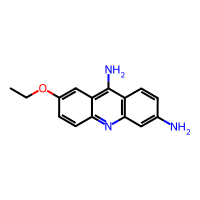
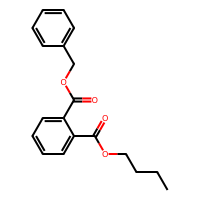
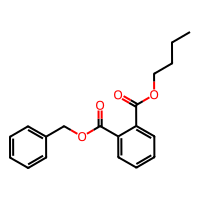
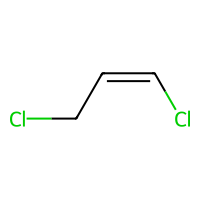
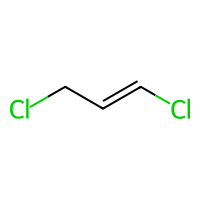
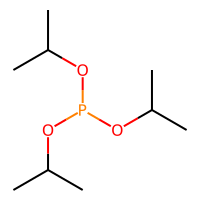
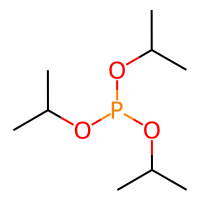
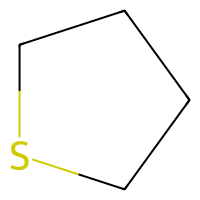
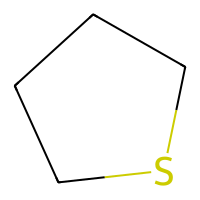
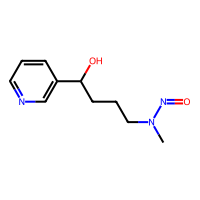
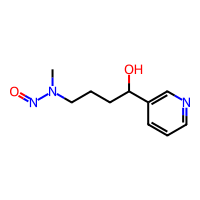
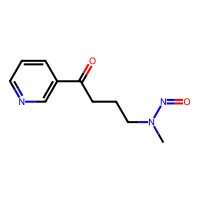
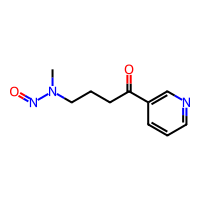

In [73]:
data

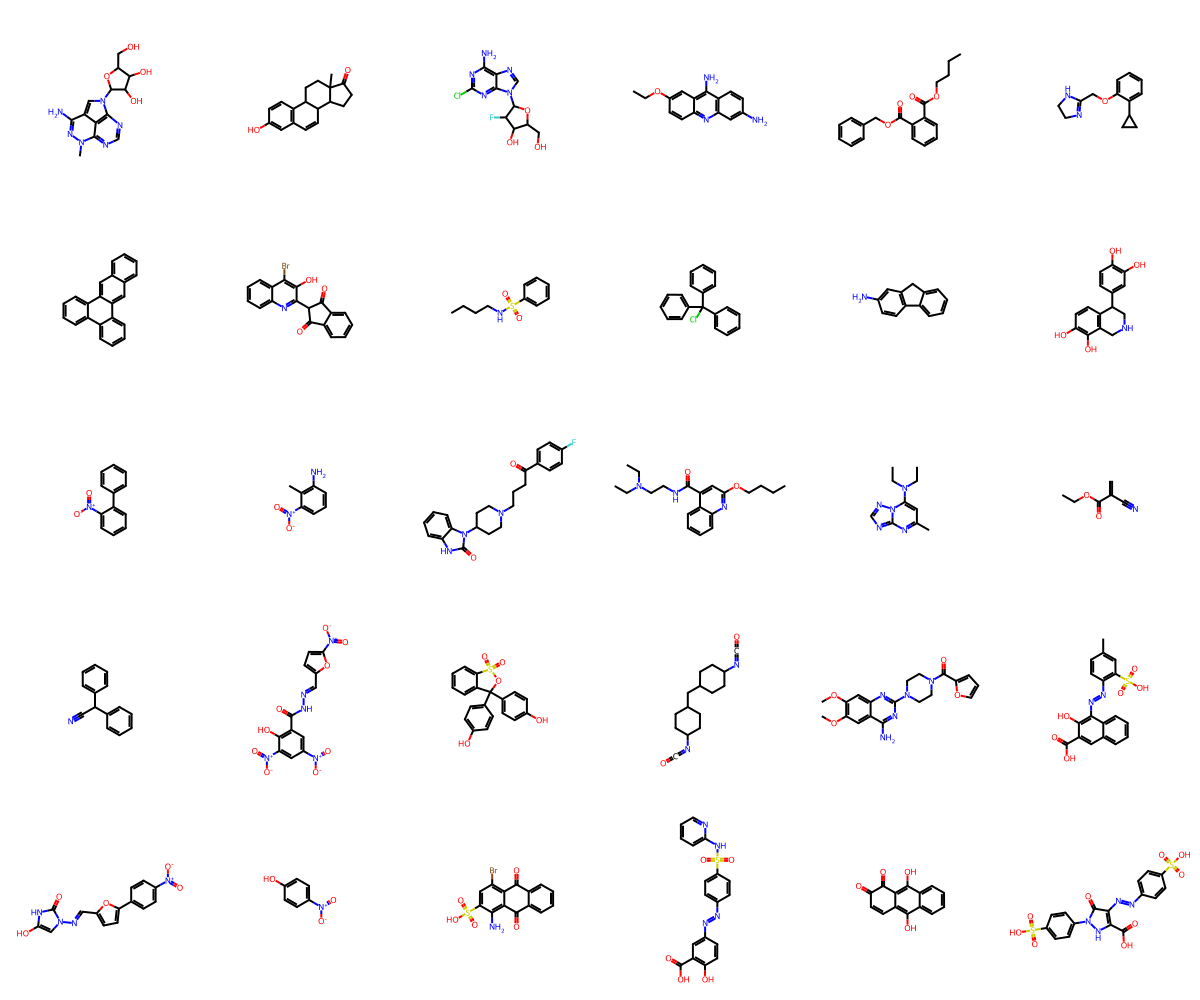

In [74]:
Draw.MolsToGridImage(data['Sanitized Molecules'][:30], molsPerRow=6, subImgSize=(200,200))

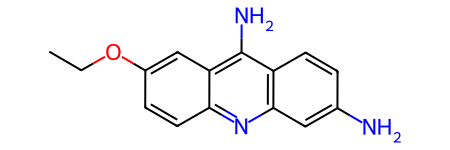

In [75]:
data['Sanitized Molecules'][3]

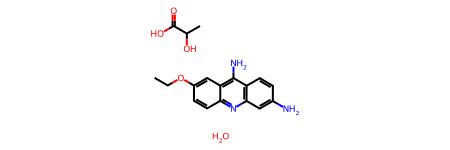

In [76]:
mol_3 = Chem.MolFromSmiles(data['PUBCHEM_SMILES'][3])
mol_3

## 5. Save DataSet<a name = 20></a>

In [77]:
data.columns

Index(['PUBCHEM_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME', 'Antagonist Activity',
       'Viability Activity', 'Antagonist Efficacy (%)', 'ID', 'Molecule',
       'Sanitized Molecules'],
      dtype='object')

In [78]:
PandasTools.WriteSDF(data, 'AID_1259247_sanitized.sdf', molColName='Sanitized Molecules',
                     properties=('PUBCHEM_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME', 'Antagonist Activity',
                                 'Viability Activity', 'Antagonist Efficacy (%)', 'ID'))